# 1 Autoencoder

Build and fit a convolutional autoencoder for the Fashion MNIST dataset. 

- The components of this network will be many of the same pieces we’ve used with convolutional classification    networks: Conv2D, MaxPooling, and so on. 
- The encoder part of the network should run the input image through a few convolutional layers of your choice. 
- The decoder part ofthe network will utilize UpSampling2D to get the representation back to the original image size.
- After training your network, visualize some examples of input images and their decoded reconstruction.

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.utils import np_utils
%matplotlib inline
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255

#y_train = np_utils.to_categorical(y_train, 10)
#y_test = np_utils.to_categorical(y_test, 10)
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

4423680/4422102 [==============================] - 2s 0us/step
x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [3]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K

input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 8)           1160      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 8)           0         
__________

In [4]:
from keras.callbacks import EarlyStopping  
eary_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto')

callbacks = [eary_stopping]

model = autoencoder.fit(x_train, x_train,
                                      epochs=100,
                                      batch_size=128,
                                      validation_data=(x_test, x_test),
                                      callbacks=callbacks)

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 11s 186us/step - loss: 0.3738 - val_loss: 0.3339
Epoch 2/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.3223 - val_loss: 0.3128
Epoch 3/100
60000/60000 [==============================] - 7s 121us/step - loss: 0.3111 - val_loss: 0.3139
Epoch 4/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.3051 - val_loss: 0.3076
Epoch 5/100
60000/60000 [==============================] - 7s 121us/step - loss: 0.3011 - val_loss: 0.2980
Epoch 6/100
60000/60000 [==============================] - 7s 121us/step - loss: 0.2985 - val_loss: 0.3016
Epoch 7/100
60000/60000 [==============================] - 7s 121us/step - loss: 0.2966 - val_loss: 0.3000
Epoch 8/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.2950 - val_loss: 0.2934
Epoch 9/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.2935 - val

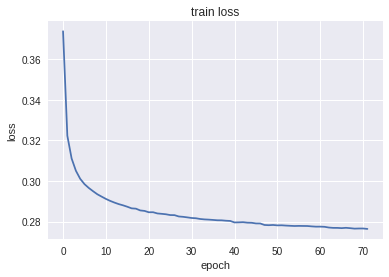

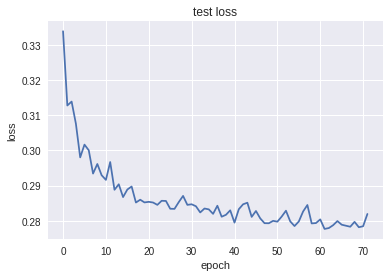

In [5]:
# Evaluate

plt.plot(model.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('train loss')
plt.show()
plt.plot(model.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('test loss')
plt.show()



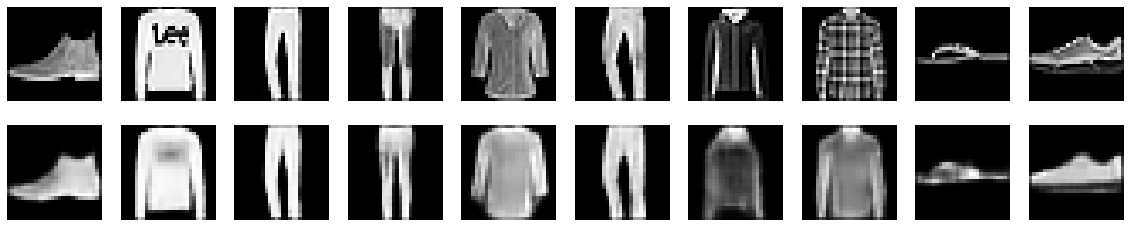

In [6]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Image Classification

## 2.1Deep CNN
Build a deep CNN to classify the images. 
- Provide a brief description of the architectural choices you’ve made: kernel sizes, strides, padding, network depth. 
- Train your network end-to-end. Report on your model’s performance on training set and test set.


In [11]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [12]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.callbacks import EarlyStopping  
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))
model.summary()
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
eary_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto')
callbacks = [eary_stopping]
deep_cnn_model=model.fit(x=x_train,
                         y=y_train, 
                         batch_size=64,
                         epochs=100,
                         validation_data=(x_test, y_test),
                         callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 28)        280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 28)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 4732)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               605824    
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
_________________________________________________________________
Trai

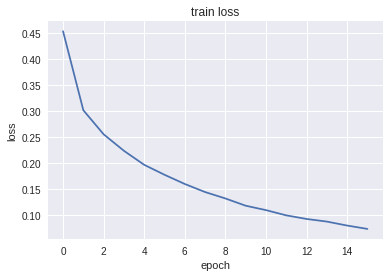

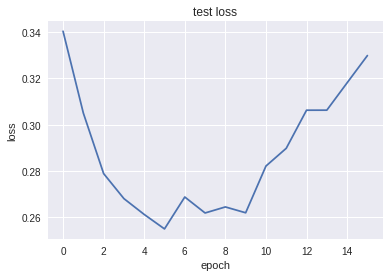

In [13]:
#Evaluate

plt.plot(deep_cnn_model.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('train loss')
plt.show()
plt.plot(deep_cnn_model.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('test loss')
plt.show()

## 2.2 Transfer Learning

Repeat the same task, but this time 
- utilize a pre-trained network for the major- ity of your model. 
- You should only train the final Dense layer, all other weights should be fixed. 
- You can use whichever pre-trained backbone you like (ResNet, VGG, etc). 
- Report on your model’s performance on training set and test set.

In [7]:
from keras.preprocessing.image import img_to_array, array_to_img
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np
 # Transfer Learning

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.reshape(x_train.shape[0], 784).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 784).astype('float32')

# Convert the images into 3 channels
x_train=np.dstack([x_train] * 3)
x_test=np.dstack([x_test]*3)

x_train = x_train.reshape(x_train.shape[0],28,28,3).astype('float32')
x_test = x_test.reshape(x_test.shape[0],28,28,3).astype('float32')

x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_train])
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((48,48))) for im in x_test])


x_train = x_train / 255
x_test = x_test / 255

#label for each image
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)


IMG_WIDTH = 48
IMG_HEIGHT = 48
IMG_DEPTH = 3
BATCH_SIZE = 16

x_train = preprocess_input(x_train)
x_test  = preprocess_input (x_test)

vgg = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_DEPTH)
                 )
vgg.summary()

58892288/58889256 [==============================] - 6s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 48, 48, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 48, 48, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 48, 48, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 24, 24, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 24, 24, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 24, 24, 128)       147584    
_________________________________________________________________
block2_pool

In [8]:
# Extracting features

train_features = vgg.predict(np.array(x_train), batch_size=BATCH_SIZE, verbose=1)
test_features = vgg.predict(np.array(x_test), batch_size=BATCH_SIZE, verbose=1)

# # Flatten extracted features

train_features_flat = np.reshape(train_features, (60000, 1*1*512))
test_features_flat = np.reshape(test_features, (10000, 1*1*512))

10000/10000 [==============================] - 11s 1ms/step


In [11]:
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import SGD, Adam, RMSprop
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D, UpSampling2D

NB_TRAIN_SAMPLES = train_features_flat.shape[0]

trans_model = Sequential()
trans_model.add(Dense(512, activation='relu', input_dim=(1*1*512)))
trans_model.add(LeakyReLU(alpha=0.1))
trans_model.add(Dense(10, activation='softmax'))

trans_model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['acc'])

trans_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 267,786
Trainable params: 267,786
Non-trainable params: 0
_________________________________________________________________


In [12]:
from keras.callbacks import EarlyStopping  
eary_stopping = EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto')

callbacks = [eary_stopping]

transfer_model = trans_model.fit(
    train_features_flat,
    y_train,
    epochs=100,
    callbacks=callbacks
)

Epoch 1/100
60000/60000 [==============================] - 11s 176us/step - loss: 1.3918 - acc: 0.4879
Epoch 2/100
60000/60000 [==============================] - 10s 169us/step - loss: 1.0343 - acc: 0.6181
Epoch 3/100
60000/60000 [==============================] - 10s 169us/step - loss: 0.9538 - acc: 0.6492
Epoch 4/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.9066 - acc: 0.6660
Epoch 5/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.8822 - acc: 0.6739
Epoch 6/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.8600 - acc: 0.6838
Epoch 7/100
60000/60000 [==============================] - 10s 170us/step - loss: 0.8426 - acc: 0.6908
Epoch 8/100
60000/60000 [==============================] - 10s 167us/step - loss: 0.8320 - acc: 0.6926
Epoch 9/100
60000/60000 [==============================] - 10s 168us/step - loss: 0.8210 - acc: 0.6989
Epoch 10/100
60000/60000 [==============================] - 10s 168us/ste

In [13]:
# Evaluate the model 
score = trans_model.evaluate(test_features_flat, y_test, verbose=0)
print('Test Loss and Accuracy:', score)

Test Loss and Accuracy: [0.6929168213844299, 0.7504]


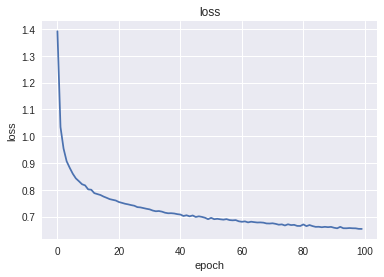

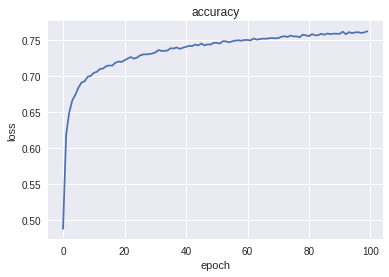

In [16]:
#Evaluate

plt.plot(transfer_model.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('loss')
plt.show()
plt.plot(transfer_model.history['acc'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title('accuracy')
plt.show()

# 3 Text classification

## 3.1 RNN

Build and train a Recurrent Neural Network to solve this text classification task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import skimage
import itertools

from string import printable
from keras import backend as K
from skimage.transform import resize
from keras.datasets import fashion_mnist
from keras import regularizers
from keras import callbacks
from keras.models import Sequential, Model
from keras.layers import Embedding, LSTM, Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D, UpSampling2D
from keras.layers import BatchNormalization, Lambda, Convolution1D, Convolution2D, ELU, concatenate
from keras.utils import np_utils
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_curve, auc
from keras.optimizers import SGD, Adam, RMSprop
from keras.layers.advanced_activations import LeakyReLU
from keras.callbacks import EarlyStopping  

Using TensorFlow backend.


In [7]:
import urllib3  # the lib that handles the url stuff
http = urllib3.PoolManager()
r_benign = http.request('GET', 'https://s3.amazonaws.com/anly-590/url-classification/benign-urls.txt')
beni=r_benign.data.decode('utf-8').splitlines()
beni=[w for w in beni if "#" not in w]

r_mali = http.request('GET', 'https://s3.amazonaws.com/anly-590/url-classification/malicious-urls.txt')
mali=r_mali.data.decode('utf-8').splitlines()
mali=[w for w in mali if "#" not in w]


/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)
/usr/local/lib/python3.6/dist-packages/urllib3/connectionpool.py:858: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


In [0]:
import numpy as np
import pandas as pd
from string import printable
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

x_train = beni + mali
y_train = np.concatenate( [ np.ones(len(beni)), np.zeros(len(mali)) ])
df = pd.DataFrame({'urls':x_train, 'label':y_train})

# considering Python's 100 printable characters only and convert them to int
url_int_tokens = [[printable.index(x) + 1 for x in url if x in printable] for url in df.urls]

#  All URLs have to be of the same length. This results in cropping or padding with zeros. I choose a max length of 75 characters.
max_len=75
X = pad_sequences(url_int_tokens, maxlen=max_len)
 
# convert labels form df to numpy array
target = np.array(df.label)
X_train, X_test, target_train, target_test = train_test_split(X, target, test_size=0.25, random_state=33)

In [10]:
from keras import regularizers
from keras.layers import Embedding, LSTM, Dense, Dropout, Activation, Flatten, Input, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import SGD, Adam, RMSprop
# LSTM Model

main_input = Input(shape=(75,), dtype='int32', name='main_input')
# Embedding layer
emb = Embedding(input_dim=100, output_dim=32, input_length=75,
            dropout=0.2, W_regularizer=regularizers.l2(1e-4))(main_input) 

# LSTM layer
lstm = LSTM(32)(emb)
lstm = Dropout(0.5)(lstm)

# Output layer (last fully connected layer)
output = Dense(1, activation='sigmoid', name='output')(lstm)

# Compile model and define optimizer
model = Model(input=[main_input], output=[output])
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(input_dim=100, output_dim=32, input_length=75, embeddings_regularizer=<keras.reg...)`
  # Remove the CWD from sys.path while we load stuff.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 75)                0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 75, 32)            3200      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dropout_8 (Dropout)          (None, 32)                0         
_________________________________________________________________
output (Dense)               (None, 1)                 33        
Total params: 11,553
Trainable params: 11,553
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


In [26]:
from keras.callbacks import EarlyStopping 
eary_stopping = EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto')


model.fit(X_train, target_train, epochs=10, batch_size=32, callbacks=[eary_stopping])

Epoch 1/10
50483/50483 [==============================] - 85s 2ms/step - loss: 0.0191 - acc: 0.9916
Epoch 2/10
50483/50483 [==============================] - 84s 2ms/step - loss: 0.0194 - acc: 0.9917
Epoch 3/10
50483/50483 [==============================] - 83s 2ms/step - loss: 0.0194 - acc: 0.9912
Epoch 4/10
50483/50483 [==============================] - 83s 2ms/step - loss: 0.0192 - acc: 0.9911
Epoch 5/10
50483/50483 [==============================] - 84s 2ms/step - loss: 0.0194 - acc: 0.9912
Epoch 6/10
50483/50483 [==============================] - 84s 2ms/step - loss: 0.0193 - acc: 0.9915
Epoch 7/10
50483/50483 [==============================] - 84s 2ms/step - loss: 0.0192 - acc: 0.9914
Epoch 8/10
50483/50483 [==============================] - 84s 2ms/step - loss: 0.0188 - acc: 0.9915
Epoch 9/10
50483/50483 [==============================] - 84s 2ms/step - loss: 0.0190 - acc: 0.9914
Epoch 10/10
50483/50483 [==============================] - 84s 2ms/step - loss: 0.0188 - acc: 0.9917

In [27]:
loss, accuracy = model.evaluate(X_test, target_test, verbose=1)
print('Accuracy: ', accuracy, '\n')

16828/16828 [==============================] - 5s 306us/step
Accuracy:  0.98924411690544 



## 3.2 CNN

Build and train a 1D CNN for this text classification task. You might gain some insight and inspiration from these text classification approaches:
• http://www.aclweb.org/anthology/D14-1181 • https://arxiv.org/abs/1702.08568

In [28]:
# CNN Model

max_len=75
emb_dim=32
max_vocab_len=100
W_reg=regularizers.l2(1e-4)

# Input
main_input = Input(shape=(max_len,), dtype='int32', name='main_input')
# Embedding layer
emb = Embedding(input_dim=max_vocab_len, output_dim=emb_dim, input_length=max_len,
            W_regularizer=W_reg)(main_input) 
emb = Dropout(0.25)(emb)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Embedding` call to the Keras 2 API: `Embedding(input_dim=100, output_dim=32, input_length=75, embeddings_regularizer=<keras.reg...)`
  # This is added back by InteractiveShellApp.init_path()


In [29]:
def sum_1d(X):
    return K.sum(X, axis=1)

def get_conv_layer(emb, kernel_size=5, filters=256):
    # Conv layer
    conv = Convolution1D(kernel_size=kernel_size, filters=filters, \
                 border_mode='same')(emb)
    conv = ELU()(conv)

    conv = Lambda(sum_1d, output_shape=(filters,))(conv)
    #conv = BatchNormalization(mode=0)(conv)
    conv = Dropout(0.5)(conv)
    return conv

# Multiple Conv Layers

# calling custom conv function from above
conv1 = get_conv_layer(emb, kernel_size=2, filters=256)
conv2 = get_conv_layer(emb, kernel_size=3, filters=256)
conv3 = get_conv_layer(emb, kernel_size=4, filters=256)
conv4 = get_conv_layer(emb, kernel_size=5, filters=256)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=2, filters=256, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=3, filters=256, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=4, filters=256, padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(kernel_size=5, filters=256, padding="same")`
  


In [30]:
# Fully Connected Layers
merged = concatenate([conv1,conv2,conv3,conv4], axis=1)

hidden1 = Dense(1024)(merged)
hidden1 = ELU()(hidden1)
hidden1 = BatchNormalization(mode=0)(hidden1)
hidden1 = Dropout(0.5)(hidden1)

hidden2 = Dense(1024)(hidden1)
hidden2 = ELU()(hidden2)
hidden2 = BatchNormalization(mode=0)(hidden2)
hidden2 = Dropout(0.5)(hidden2)

# Output layer (last fully connected layer)
output = Dense(1, activation='sigmoid', name='output')(hidden2)

# Compile model and define optimizer
cnn_model = Model(input=[main_input], output=[output])
adam = Adam(lr=1e-4, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
cnn_model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization()`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `BatchNormalization` call to the Keras 2 API: `BatchNormalization()`
  # Remove the CWD from sys.path while we load stuff.


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 75)           0                                            
__________________________________________________________________________________________________
embedding_6 (Embedding)         (None, 75, 32)       3200        main_input[0][0]                 
__________________________________________________________________________________________________
dropout_12 (Dropout)            (None, 75, 32)       0           embedding_6[0][0]                
__________________________________________________________________________________________________
conv1d_5 (Conv1D)               (None, 75, 256)      16640       dropout_12[0][0]                 
__________________________________________________________________________________________________
conv1d_6 (

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=[<tf.Tenso...)`


In [31]:
epochs = 10
batch_size = 25

eary_stopping = EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto')

cnn_model.fit(X_train, target_train, epochs=epochs, batch_size=batch_size, callbacks=[eary_stopping])

Epoch 1/10
50483/50483 [==============================] - 196s 4ms/step - loss: 0.3013 - acc: 0.8796
Epoch 2/10
50483/50483 [==============================] - 194s 4ms/step - loss: 0.1158 - acc: 0.9747
Epoch 3/10
50483/50483 [==============================] - 193s 4ms/step - loss: 0.1030 - acc: 0.9761
Epoch 4/10
50483/50483 [==============================] - 194s 4ms/step - loss: 0.0914 - acc: 0.9771
Epoch 5/10
50483/50483 [==============================] - 193s 4ms/step - loss: 0.0780 - acc: 0.9773
Epoch 6/10
50483/50483 [==============================] - 194s 4ms/step - loss: 0.0724 - acc: 0.9782
Epoch 7/10
50483/50483 [==============================] - 194s 4ms/step - loss: 0.0624 - acc: 0.9797
Epoch 8/10
50483/50483 [==============================] - 195s 4ms/step - loss: 0.0584 - acc: 0.9806
Epoch 9/10
50483/50483 [==============================] - 195s 4ms/step - loss: 0.0520 - acc: 0.9813
Epoch 10/10
50483/50483 [==============================] - 195s 4ms/step - loss: 0.0447 - a

In [32]:
loss, accuracy = cnn_model.evaluate(X_test, target_test, verbose=1)
print('Accuracy:', accuracy, '\n')

16828/16828 [==============================] - 16s 938us/step
Accuracy: 0.9834799144283337 



## 3.3 
Be sure to directly compare your two methods with an ROC curve or similar validation method. Don’t forget to create a train-test split.

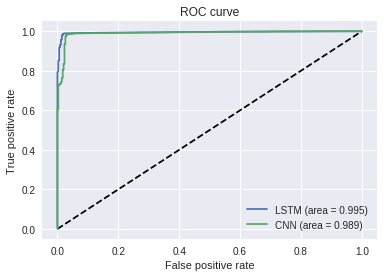

In [33]:
# LSTM and CNN ROC Curve
y_pred_keras = model.predict(X_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(target_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

cnn_y_pred_keras = cnn_model.predict(X_test).ravel()
cnn_fpr_keras, cnn_tpr_keras, cnn_thresholds_keras = roc_curve(target_test, cnn_y_pred_keras)
cnn_auc_keras = auc(cnn_fpr_keras, cnn_tpr_keras)

plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='LSTM (area = {:.3f})'.format(auc_keras))
plt.plot(cnn_fpr_keras, cnn_tpr_keras, label='CNN (area = {:.3f})'.format(cnn_auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()